## IS620 - Project 2
## Two-Node Networks
### Brian Chu | Oct 11, 2015

### (1) Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.**


I found a malaria dataset with nodes as genes and substrings.  
Source: http://danlarremore.com/bipartiteSBM/malariaData.zip

### (2) Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.**

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

**Let's first examine the original data and resulting network graph**

In [4]:
G = nx.Graph()
G = nx.read_weighted_edgelist("malaria.edgelist", delimiter="\t", comments="%")

In [7]:
len(nx.nodes(G))

1103

In [5]:
nx.number_of_edges(G)

2965

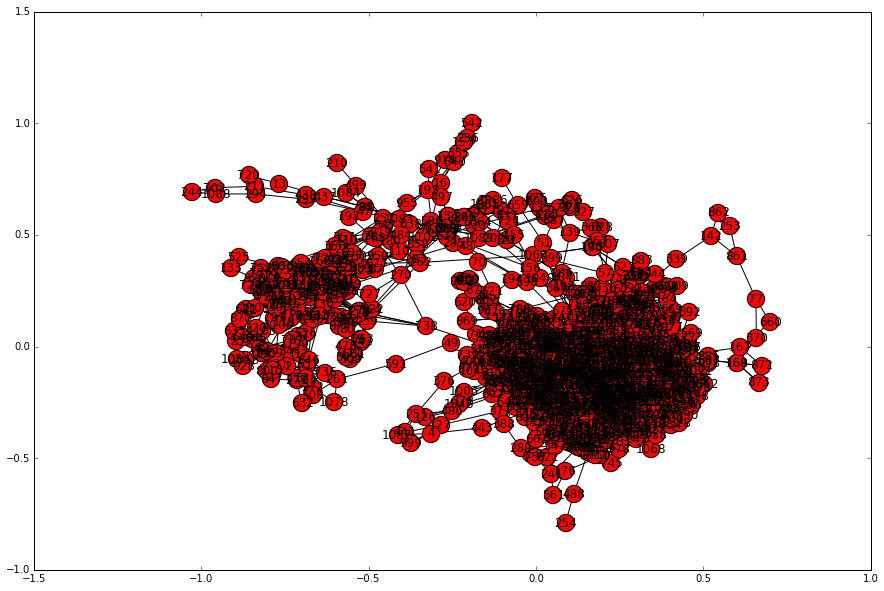

In [7]:
plt.figure(figsize=(15,10))
nx.draw_networkx(G)
plt.show()

**As expected, this is rather messy to look at but there does appear to be one large cluster and at least one other sizable one. Let's project this bipartite graph onto just the gene nodes and graph the results.**

In [8]:
# Grab list of gene nodes for projection
import csv
glist = []
with open('genes.csv', 'rb') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        glist.append(row)
glist = [item for sublist in glist for item in sublist]

In [9]:
# Use NetworkX projection function for bipartite data
from networkx.algorithms import bipartite as bi
B = bi.weighted_projected_graph(G, glist, ratio=False)
weights = [edata['weight'] for f,t,edata in B.edges(data=True)]

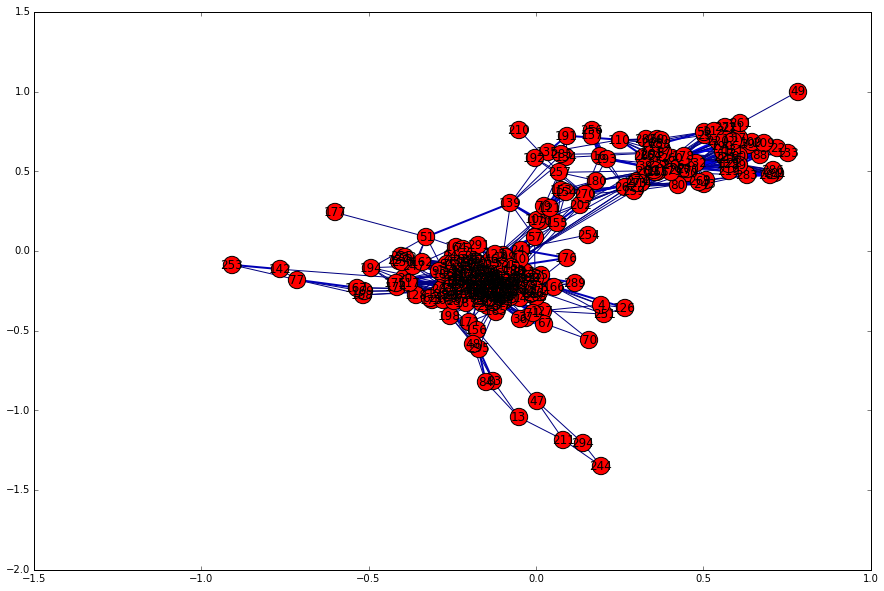

In [15]:
plt.figure(figsize = (15,10))
nx.draw_networkx(B, width=weights, edge_color=weights)

**This is a little better. We still see the one larger cluster and two smaller ones. Let's try reducing the network based on the island method.**

In [36]:
def trim_edges(g, weight=1): 
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True): 
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2

In [46]:
def island_method(g, iterations=5):
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations 
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [51]:
#cc = nx.connected_component_subgraphs(B)
islands = island_method(B)
for i in islands:
    #print i[0], len(i[1]), len(nx.connected_component_subgraphs(i[1]))
    print i[0], len(i[1]), len(i)

1 279 2
5 135 2
9 61 2
13 23 2
17 8 2
21 2 2


In [48]:
islands

[[1, <networkx.classes.graph.Graph at 0x10823f850>],
 [5, <networkx.classes.graph.Graph at 0x10823fad0>],
 [9, <networkx.classes.graph.Graph at 0x10823fc50>],
 [13, <networkx.classes.graph.Graph at 0x10823fcd0>],
 [17, <networkx.classes.graph.Graph at 0x10823fb50>],
 [21, <networkx.classes.graph.Graph at 0x10823fbd0>]]

In [128]:
B2 = trim_edges(B, 17)
#B2.edges(data=True)

In [118]:
B2.nodes()

['42', '74', '242', '226', '225', u'230', u'231', '290']

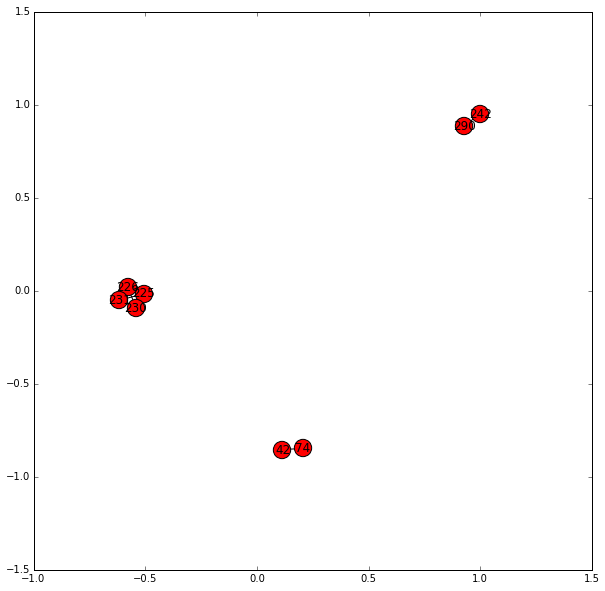

In [129]:
plt.figure(figsize = (10,10))
weights = [edata['weight'] for f,t,edata in B2.edges(data=True)]
#nx.draw_networkx(B2, width=weights, edge_color=weights)
nx.draw_networkx(B2)

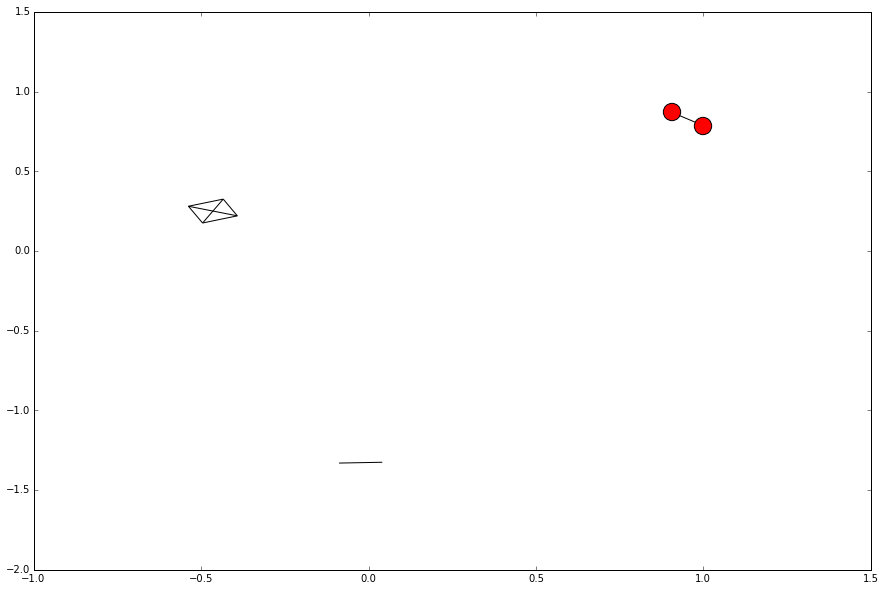

In [91]:
plt.figure(figsize = (15,10))
nx.draw_networkx(B2, nodelist=['74', '42'], with_labels=False)

In [133]:
def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda (k,v): (-v,k))
    return ms

In [136]:
nx.triangles(B2)
nx.clustering(B)
B2.nodes()

['42', '74', '242', '226', '225', u'230', u'231', '290']

In [135]:
B2c = nx.clustering(B)
B2cluster = {k:round(v,3) for k, v in B2c.items()}

B2cluster = sorted_map(B2cluster)
B2cluster

[('126', 1.0),
 ('157', 1.0),
 ('192', 1.0),
 ('253', 1.0),
 ('256', 1.0),
 ('282', 1.0),
 ('291', 1.0),
 ('70', 1.0),
 ('281', 0.857),
 ('284', 0.857),
 ('286', 0.857),
 ('109', 0.822),
 ('39', 0.822),
 ('167', 0.8),
 ('168', 0.8),
 ('169', 0.8),
 ('268', 0.8),
 ('58', 0.772),
 ('272', 0.762),
 ('23', 0.75),
 ('258', 0.745),
 ('40', 0.745),
 ('50', 0.745),
 ('111', 0.739),
 ('121', 0.733),
 ('79', 0.733),
 ('259', 0.724),
 ('232', 0.722),
 ('233', 0.722),
 ('234', 0.722),
 ('235', 0.722),
 ('173', 0.718),
 ('62', 0.718),
 ('266', 0.708),
 ('1', 0.692),
 ('190', 0.692),
 ('2', 0.692),
 ('222', 0.692),
 ('3', 0.692),
 ('243', 0.679),
 ('263', 0.679),
 ('9', 0.679),
 ('60', 0.676),
 ('110', 0.673),
 ('143', 0.673),
 ('144', 0.673),
 ('133', 0.667),
 ('191', 0.667),
 ('83', 0.667),
 ('84', 0.667),
 ('56', 0.656),
 ('91', 0.652),
 ('255', 0.648),
 ('148', 0.643),
 ('72', 0.639),
 ('152', 0.634),
 ('114', 0.633),
 ('273', 0.633),
 ('274', 0.633),
 ('267', 0.625),
 ('295', 0.619),
 ('48', 0.

**What can you infer about each of the distinct groups?**